In [249]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

# Import results and take them to one file

In [250]:
# all csv to one csv
# List of filenames to read
filenames = ["../results/p3s_atiam0/mushra.csv", "../results/p3s_atiam1/mushra.csv", "../results/p3s_atiam2/mushra.csv", "../results/p3s_atiam3/mushra.csv", "../results/p3s_atiam4/mushra.csv"]
# List to hold dataframes
dfs = []
# Loop over filenames, read csv and append to dfs list
for filename in filenames:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate dataframes into one big dataframe
big_df = pd.concat(dfs, ignore_index=True)
# Save to file
big_df.to_csv("../results/total_mushra.csv", index=False)

# define read function and analysis function

In [266]:
# data is in csv, the first line has the column names, import it as a dataframe
def read_data(path: str):
    data = pd.read_csv(path)
    # print test name
    print("Test name is:",data["session_test_id"][0])
    # count and print the number of unique values in the column "session_uuid"
    print("Number of evaluations is:",data["session_uuid"].nunique())
    print("Number of evaluators is:",data['email'].nunique())
    # print keys of the dataframe
    print("Available information is: ", ", ".join(list(data.columns)))
    # FIX EXCEPTIONS
    # if evaluator's email is welshwitch66@gmail.com change their years of musical training to 20
    data.loc[data['email'] == 'welshwitch66@gmail.com', 'musical_training_years'] = 20
    # if years of musical training is "many", change it to 10
    data.loc[data['musical_training_years'] == 'many', 'musical_training_years'] = 10
    # if years of musical training is "7 (as a producer)", change it to 7
    data.loc[data['musical_training_years'] == '7 (as a producer)', 'musical_training_years'] = 7
    # if years of musical training is "38 ans", change it to 38
    data.loc[data['musical_training_years'] == '38 ans', 'musical_training_years'] = 38
    return data

# keys are: session_test_id,email,age,gender,musical_training_years,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_comment
# each evaluator has a unique session_uuid
# analyze evaluators
def analyze_evaluators(data, remove_inexperienced_evaluators=False):
    # Count the number of evaluators with less than 5 years of musical training
    num_inexperienced_evaluators = data[pd.to_numeric(data['musical_training_years'], errors='coerce') < 5]['session_uuid'].nunique()
    print(f"{num_inexperienced_evaluators} evaluators have less than 5 years of musical training.")
    if remove_inexperienced_evaluators:
        print("They will be excluded from the analysis.")
        # Remove the inexperienced evaluators from the data
        data = data[pd.to_numeric(data['musical_training_years'], errors='coerce') >= 5]
        print("Number of evaluations is:",data["session_uuid"].nunique())
    
    # Count the number of unique evaluators
    num_evaluators = data['email'].nunique()
    # Count the number of unique male evaluators
    num_male_evaluators = data[data['gender'] == 'male']['session_uuid'].nunique()
    # Count the number of unique female evaluators
    num_female_evaluators = data[data['gender'] == 'female']['session_uuid'].nunique()
    print(f"We have {num_male_evaluators} male evaluators and {num_female_evaluators} female evaluators out of {num_evaluators} unique evaluators.")

    # Calculate the average age
    avg_age = data['age'].mean(skipna=True)
    print(f"The average age of evaluators is {avg_age:.2f} years.")
    # Calculate the average years of musical training, ignoring non-numeric values
    avg_training_years = pd.to_numeric(data['musical_training_years'], errors='coerce').mean(skipna=True)
    print(f"The average years of musical training of the evaluators is {avg_training_years:.2f} years.")

    # Find the oldest and youngest evaluators
    oldest_evaluator = data.loc[data['age'].idxmax()]
    youngest_evaluator = data.loc[data['age'].idxmin()]
    print(f"The oldest evaluator is {oldest_evaluator['email']} (age {oldest_evaluator['age']}), and the youngest evaluator is {youngest_evaluator['email']} (age {youngest_evaluator['age']}).")

    # Count the number of evaluators with emails ending in "@ircam.fr" or "@atiam.fr"
    ircam_evaluators = data[data['email'].str.endswith('@ircam.fr')]['email'].unique()
    atiam_evaluators = data[data['email'].str.endswith('@atiam.fr')]['email'].unique()
    num_ircam_evaluators = len(ircam_evaluators)
    num_atiam_evaluators = len(atiam_evaluators)
    if num_ircam_evaluators > 0:
        print(f"{num_ircam_evaluators} evaluators have emails ending in '@ircam.fr'.")
        print("Their names are:")
        print("\n".join(ircam_evaluators))
    if num_atiam_evaluators > 0:
        print(f"{num_atiam_evaluators} evaluators have emails ending in '@atiam.fr'.")
        print("Their names are:")
        print("\n".join(atiam_evaluators))

    return data

i=3
filename = "../results/p3s_atiam"+str(i)+"/mushra.csv"
data = read_data(filename)
data = analyze_evaluators(data, remove_inexperienced_evaluators=False)


Test name is: P3S_ATIAM3
Number of evaluations is: 12
Number of evaluators is: 12
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment
1 evaluators have less than 5 years of musical training.
We have 8 male evaluators and 3 female evaluators out of 12 unique evaluators.
The average age of evaluators is 27.75 years.
The average years of musical training of the evaluators is 11.42 years.
The oldest evaluator is martinrocamora@gmail.com (age 46), and the youngest evaluator is berger.clementine@orange.fr (age 21).
1 evaluators have emails ending in '@ircam.fr'.
Their names are:
teytaut@ircam.fr


# input data

In [279]:
data = read_data("../results/total_mushra.csv")

remove_inexperienced_evaluators = True
remove_inconsistent_evaluators = True

data = analyze_evaluators(data, remove_inexperienced_evaluators=remove_inexperienced_evaluators)

Test name is: P3S_ATIAM0
Number of evaluations is: 49
Number of evaluators is: 47
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment
9 evaluators have less than 5 years of musical training.
They will be excluded from the analysis.
Number of evaluations is: 39
We have 30 male evaluators and 8 female evaluators out of 37 unique evaluators.
The average age of evaluators is 30.77 years.
The average years of musical training of the evaluators is 13.85 years.
The oldest evaluator is Yves_desvallees@orange.fr  (age 58), and the youngest evaluator is berger.clementine@orange.fr (age 21).
9 evaluators have emails ending in '@ircam.fr'.
Their names are:
victor.bigand@ircam.fr
aschwarz@ircam.fr
chedin@ircam.fr
meresmanhiggs@ircam.fr
philippe.langlois@ircam.fr
fouillou@ircam.fr
daglik@ircam.fr
teytaut@ircam.fr
lenny.renault@ircam.fr
1 evaluators have emails ending in '@atiam.fr'.

# check consistency of envaluators
and if it is bad, delete them

In [280]:
def check_rating_consistency(data, remove_inconsistent_evaluators=False):
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    trials = ['overall', 'interference', 'distortion', 'artifacts']
    count_high_inconsistencies = 0
    count_low_inconsistencies = 0
    for trial in trials:
        trial_data = data[data['trial_id'] == trial]
        for email in trial_data['email'].unique():
            email_data = trial_data[trial_data['email'] == email]
            for stimulus in stimuli_order:
                stimulus_data = email_data[email_data['rating_stimulus'] == stimulus]
                reference_data = email_data[email_data['rating_stimulus'] == 'reference']
                anchor_data = email_data[email_data['rating_stimulus'] == 'anchor']
                if len(stimulus_data) > 0 and len(reference_data) > 0 and len(anchor_data) > 0:
                    stimulus_score = stimulus_data['rating_score'].mean()
                    reference_score = reference_data['rating_score'].mean()
                    anchor_score = anchor_data['rating_score'].mean()
                    if stimulus_score > reference_score:
                        print(f"{email} rated {stimulus} higher than reference in {trial} trial")
                        count_high_inconsistencies += 1
                        if remove_inconsistent_evaluators:
                            # remove participant from the data
                            data = data[data['email'] != email]
                    elif stimulus_score < anchor_score:
                        print(f"{email} rated {stimulus} lower than anchor in {trial} trial")
                        count_low_inconsistencies += 1

    print(f"Found {count_high_inconsistencies} high inconsistencies and {count_low_inconsistencies} low inconsistencies.")
    if remove_inconsistent_evaluators:
        print("Inconsistent evaluators (of referance) have been removed from the data.")
        print("Number of evaluations is:",data["session_uuid"].nunique())
    return data

data = check_rating_consistency(data, remove_inconsistent_evaluators=remove_inconsistent_evaluators)

data = analyze_evaluators(data, remove_inexperienced_evaluators=remove_inexperienced_evaluators)

welshwitch66@gmail.com rated no_effect_center lower than anchor in overall trial
augustindesvallees@yahoo.fr rated no_effect lower than anchor in overall trial
augustindesvallees@yahoo.fr rated sto lower than anchor in overall trial
aschwarz@ircam.fr rated no_effect_center lower than anchor in overall trial
aschwarz@ircam.fr rated no_effect lower than anchor in overall trial
aschwarz@ircam.fr rated sto lower than anchor in overall trial
neven@crans.org rated no_effect_center higher than reference in overall trial
neven@crans.org rated no_effect higher than reference in overall trial
neven@crans.org rated sto higher than reference in overall trial
fouillou@ircam.fr rated no_effect_center lower than anchor in overall trial
njaffe5@gmail.com rated sto lower than anchor in overall trial
pablo.martin.lu@gmail.com rated no_effect higher than reference in overall trial
irigaray@fing.edu.uy rated no_effect_center lower than anchor in interference trial
irigaray@fing.edu.uy rated sto lower than

# violin plots

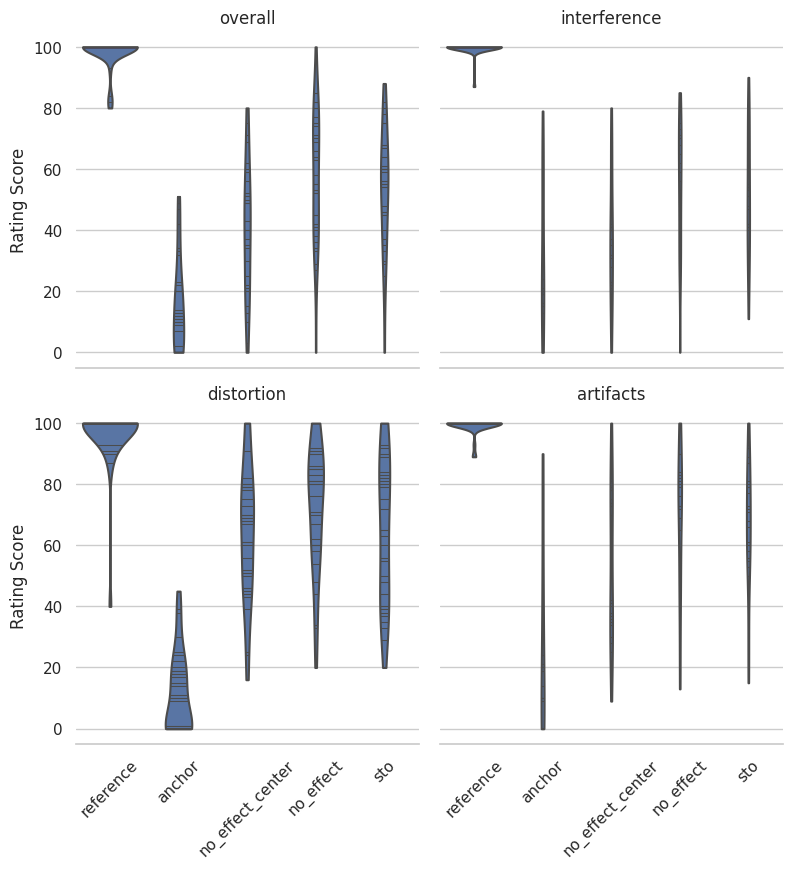

In [281]:
def plot_ratings(data):
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    g = sns.FacetGrid(data, col="trial_id", col_wrap=2, height=4, xlim=(-1, len(stimuli_order)))
    g.map(sns.violinplot, "rating_stimulus", "rating_score", order=stimuli_order, inner="stick", cut=0)
    g.set_axis_labels("", "Rating Score")
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    g.add_legend()
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)
    

plot_ratings(data)

# box plots

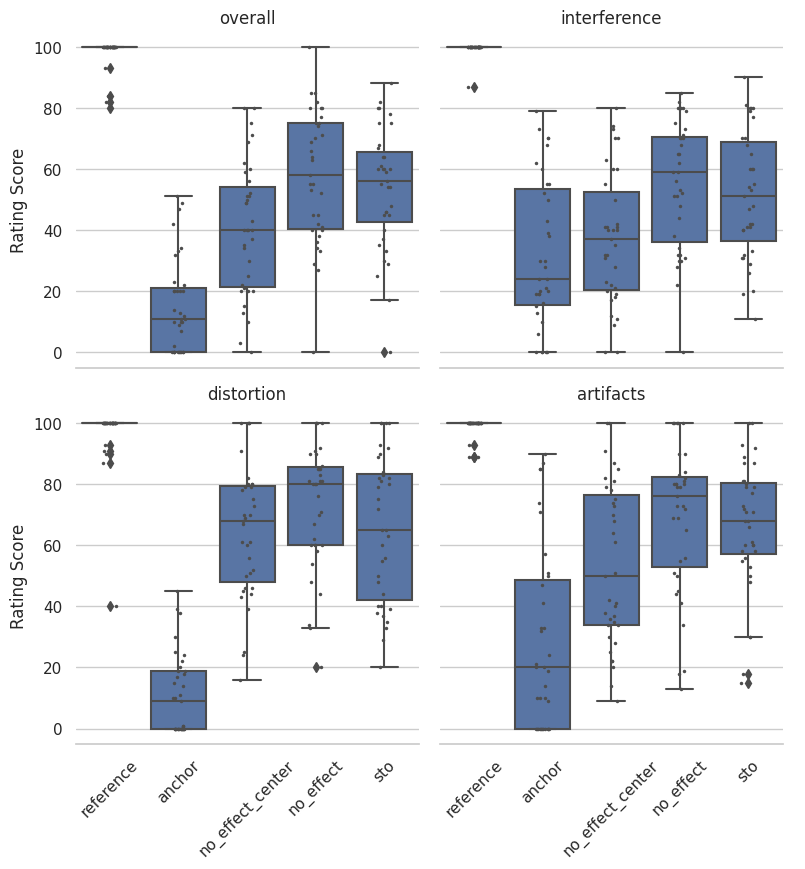

In [282]:
def plot_ratings_boxplot(data):
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    g = sns.FacetGrid(data, col="trial_id", col_wrap=2, height=4, xlim=(-1, len(stimuli_order)))
    g.map(sns.boxplot, "rating_stimulus", "rating_score", order=stimuli_order)
    g.map(sns.stripplot, "rating_stimulus", "rating_score", order=stimuli_order, color=".3", size=2.5)
    g.set_axis_labels("", "Rating Score")
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    g.add_legend()
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)
    # save figure
    if remove_inexperienced_evaluators:
        if remove_inconsistent_evaluators:
            plt.savefig('../results/mushra_all_boxplot_no_inexperienced_no_inconsistent.png', dpi=300)
        else:
            plt.savefig('../results/mushra_all_boxplot_no_inexperienced.png', dpi=300)
    else:
        plt.savefig('../results/mushra_all_boxplot.png', dpi=300)
plot_ratings_boxplot(data)

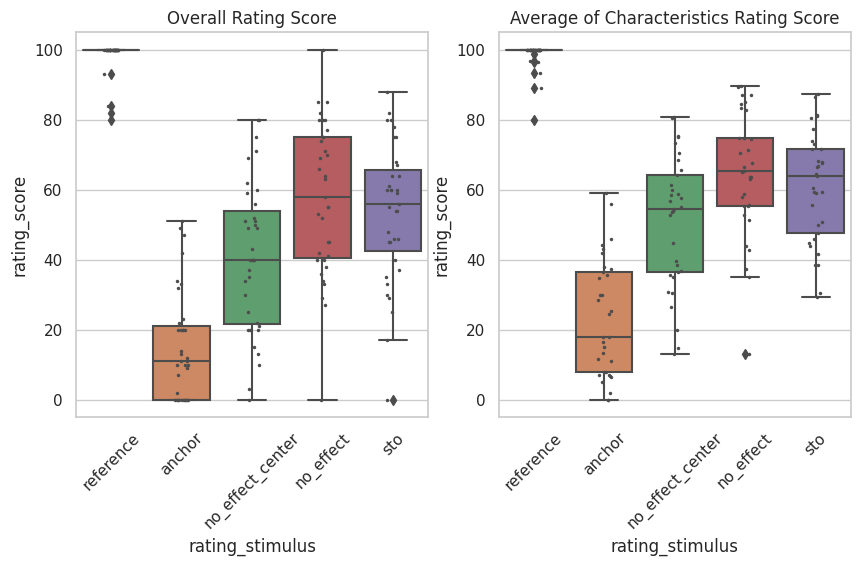

In [283]:
def plot_overall_vs_avg_boxplots(data):
    # Plot the boxplots
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    overall_data = data[data['trial_id'] == 'overall']
    # g = sns.catplot(x='rating_stimulus', y='rating_score', kind='box', data=overall_data, 
    #                 order=stimuli_order, height=4, aspect=1.5)
    sns.boxplot(x='rating_stimulus', y='rating_score', data=overall_data,
                order=stimuli_order, ax=axs[0])
    sns.stripplot(x='rating_stimulus', y='rating_score', data=overall_data,
                    order=stimuli_order, color=".3", size=2.5, ax=axs[0])
    
    data = data[(data["trial_id"] == "interference") | (data["trial_id"] == "distortion") | (data["trial_id"] == "artifacts")]
    data = data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    sns.boxplot(x="rating_stimulus", y="rating_score", data=data, order=stimuli_order)
    sns.stripplot(x="rating_stimulus", y="rating_score", data=data, order=stimuli_order, color=".3", size=2.5)
    
    
    # Set the titles
    axs[0].set_title('Overall Rating Score')
    axs[1].set_title('Average of Characteristics Rating Score')
    # g.set_axis_labels("", "Rating Score")
    # g.fig.suptitle('Overall Ratings')
    # g.despine(left=True)
    # g.set_xticklabels(stimuli_order, rotation=45)
    
    axs[0].set_xticklabels(stimuli_order, rotation=45)
    axs[1].set_xticklabels(stimuli_order, rotation=45)

    # save figure
    if remove_inexperienced_evaluators:
        if remove_inconsistent_evaluators:
            plt.savefig('../results/mushra_overall_vs_avg_boxplot_no_inexperienced_no_inconsistent.png', dpi=300)
        else:
            plt.savefig('../results/mushra_overall_vs_avg_boxplot_no_inexperienced.png', dpi=300)
    else:
        plt.savefig('../results/mushra_overall_vs_avg_boxplot.png', dpi=300)    

plot_overall_vs_avg_boxplots(data)

# plots across instruments

Instrument:  flute
Test name is: P3S_ATIAM0
Number of evaluations is: 6
Number of evaluators is: 6
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment
We have 4 male evaluators and 2 female evaluators out of 6 unique evaluators.
The average age of evaluators is 39.83 years.
The average years of musical training of the evaluators is 11.50 years.
The oldest evaluator is Yves_desvallees@orange.fr  (age 58), and the youngest evaluator is leo.raybois@gmail.com (age 24).
2 evaluators have less than 5 years of musical training.
Instrument:  clarinet
Test name is: P3S_ATIAM1
Number of evaluations is: 7
Number of evaluators is: 7
Available information is:  session_test_id, email, age, gender, musical_training_years, session_uuid, trial_id, rating_stimulus, rating_score, rating_time, rating_comment
We have 5 male evaluators and 2 female evaluators out of 7 unique evaluators.
The

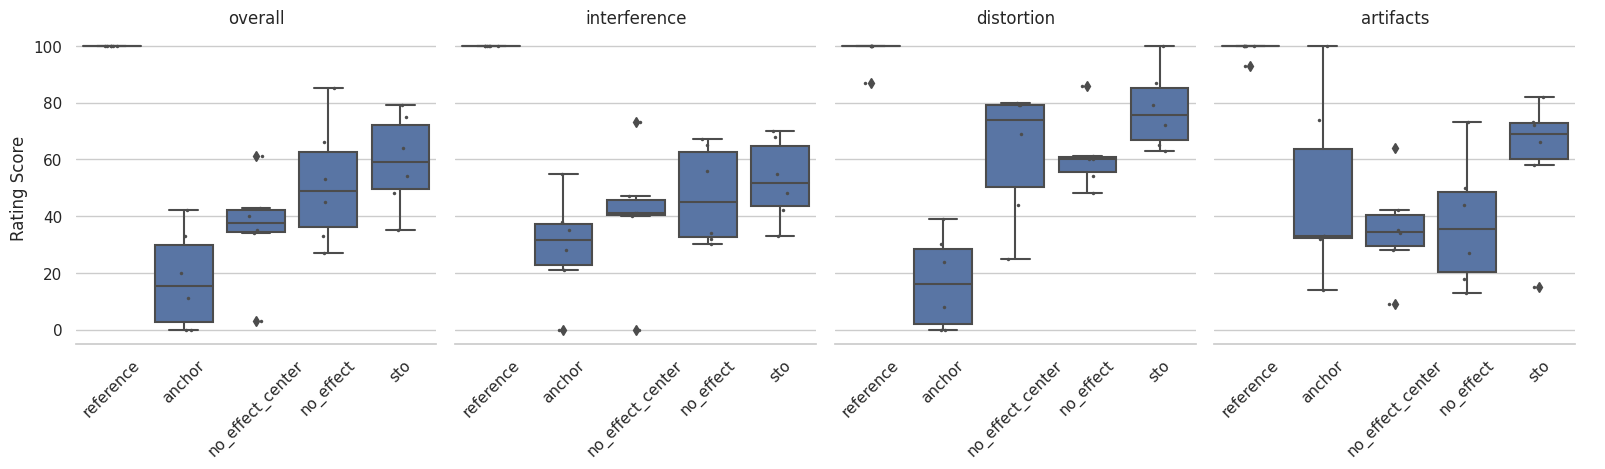

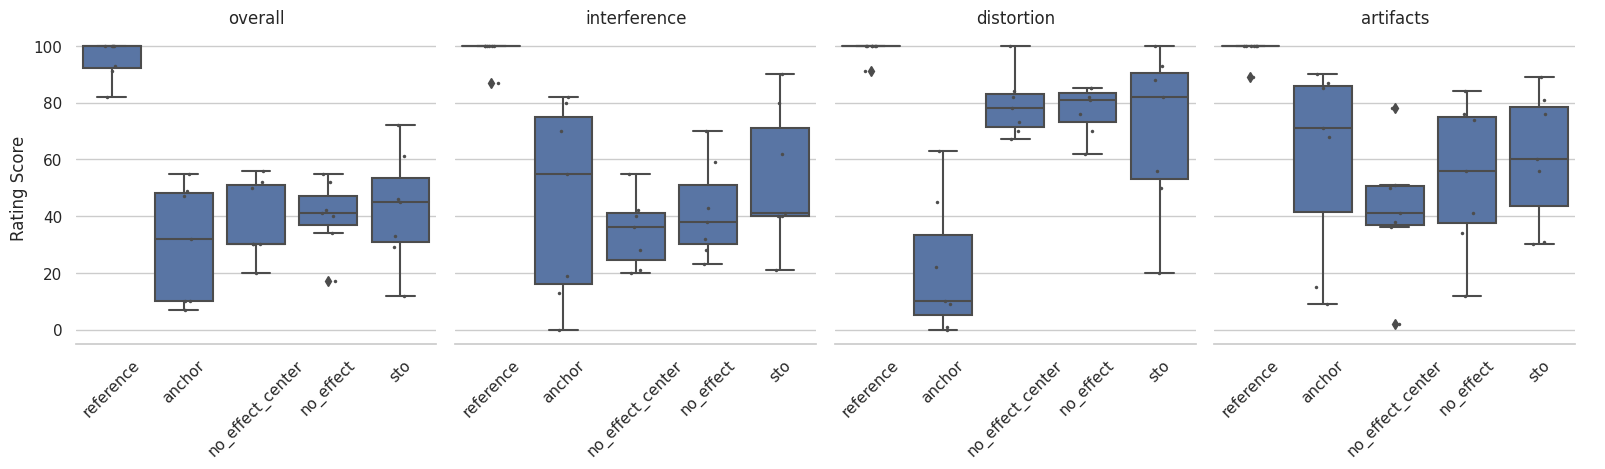

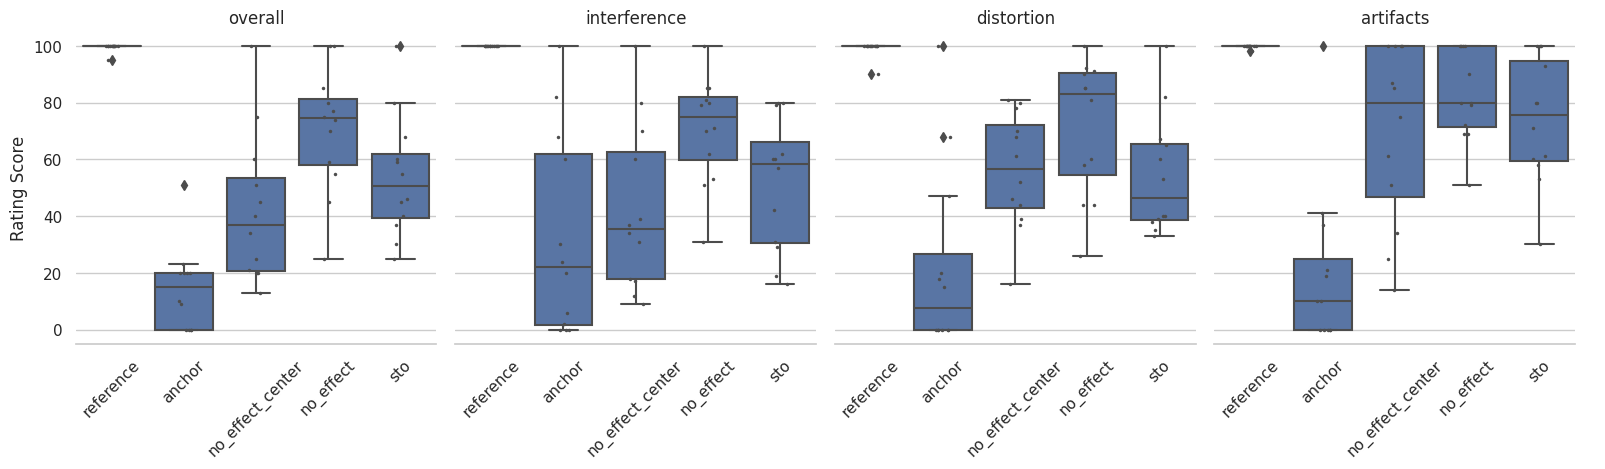

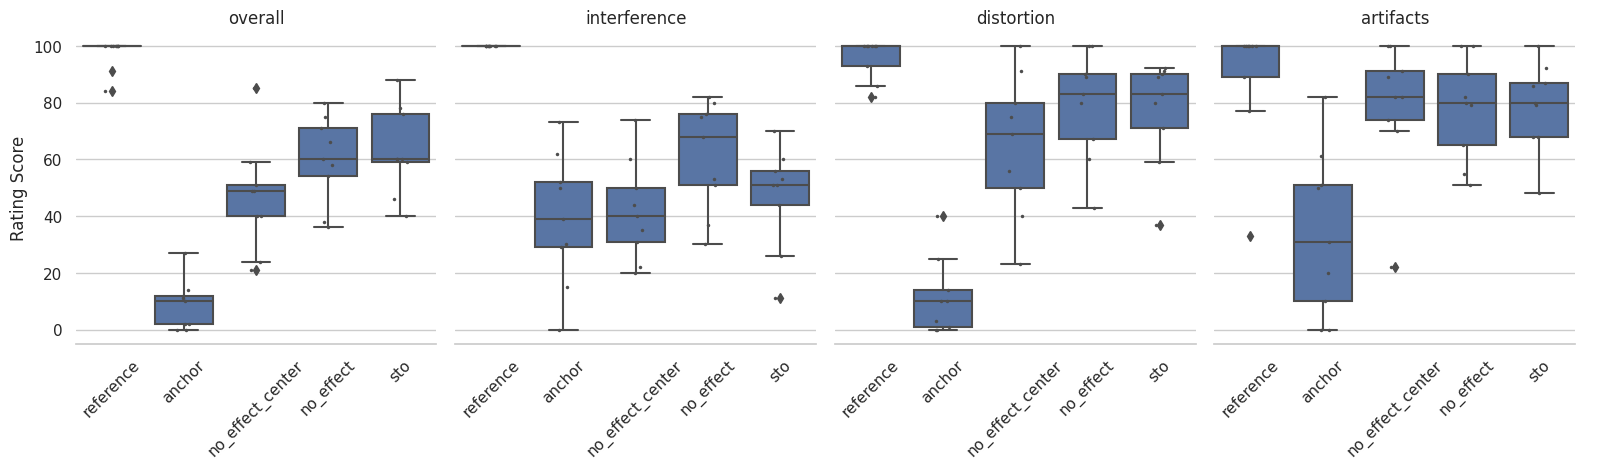

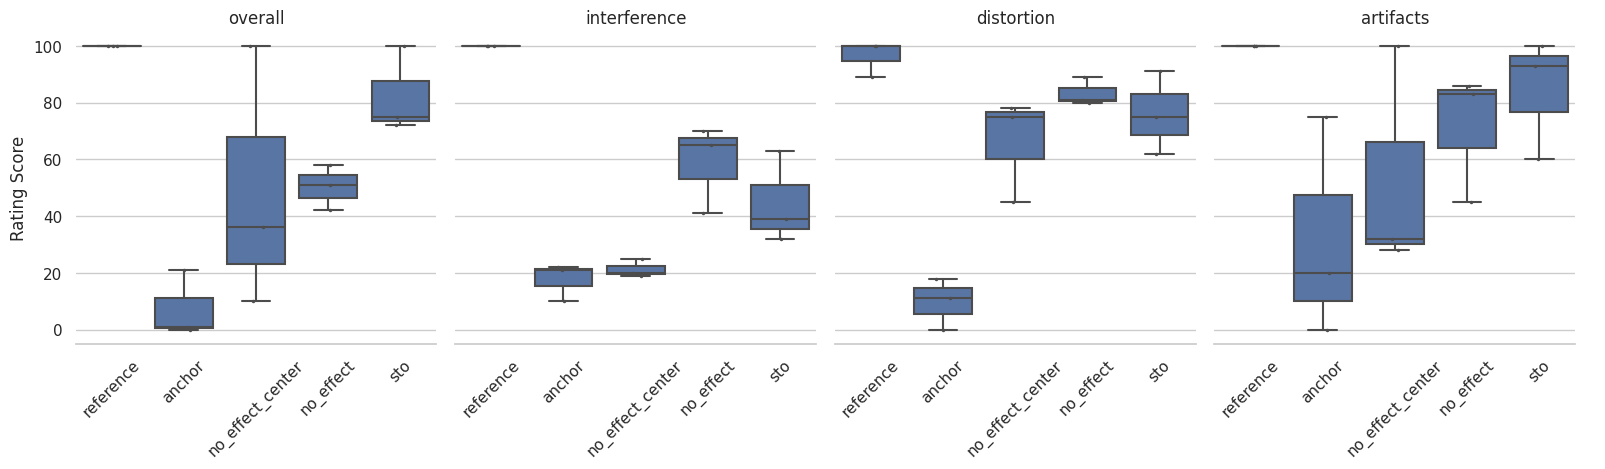

In [134]:
instruments = ['flute', 'clarinet', 'cello', '1st violin', '2nd violin']
for i in range(5):
    filename = "../results/p3s_atiam"+str(i)+"/mushra.csv"
    print("=====================================")
    print("Instrument: ", instruments[i])
    inst_data = read_data(filename)
    analyze_evaluators(inst_data)
    plot_ratings_boxplot(inst_data)
    # plt.show()
    print("=====================================")

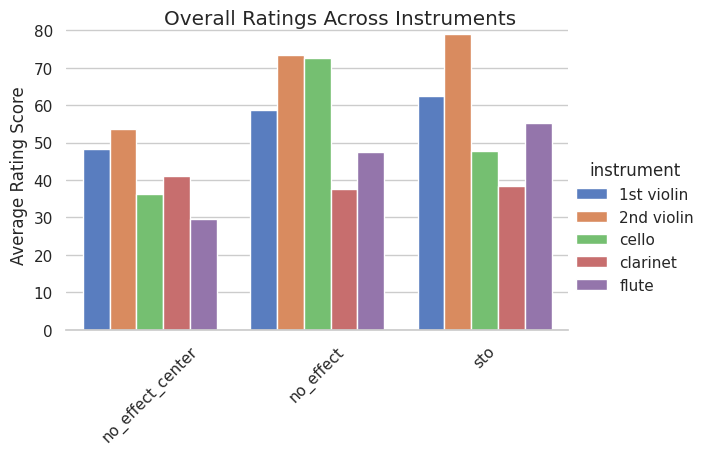

In [291]:
def plot_instrument_average(data):
    stimuli_order = ['no_effect_center', 'no_effect', 'sto']
    instruments = {'P3S_ATIAM0': 'flute', 'P3S_ATIAM1': 'clarinet', 'P3S_ATIAM2': 'cello', 'P3S_ATIAM3': '1st violin', 'P3S_ATIAM4': '2nd violin'}
    overall_data = data[data['trial_id'] == 'overall']
    overall_data = overall_data[overall_data['rating_stimulus'].isin(stimuli_order)]
    overall_data['instrument'] = overall_data['session_test_id'].map(instruments)
    overall_data = overall_data.groupby(['instrument', 'rating_stimulus'])['rating_score'].mean().reset_index()

    sns.set(style="whitegrid")
    
    # add variance to bars
    g = sns.catplot(x='rating_stimulus', y='rating_score', hue='instrument', kind='bar', data=overall_data,
                    order=stimuli_order, height=4, aspect=1.5, errorbar='sd',
                    palette=sns.color_palette("muted", 5))
    
    g.set_axis_labels("", "Average Rating Score")
    g.fig.suptitle('Overall Ratings Across Instruments')
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)
    # save figure
    if remove_inexperienced_evaluators:
        if remove_inconsistent_evaluators:
            plt.savefig('../results/mushra_overall_instruments_no_inexperienced_no_inconsistent.png', dpi=300)
        else:
            plt.savefig('../results/mushra_overall_instruments_no_inexperienced.png', dpi=300)
    else:
        plt.savefig('../results/mushra_overall_instruments.png', dpi=300)

plot_instrument_average(data)


# Old rubbish functions

/home/ivan/anaconda3/envs/P3S/lib/python3.10/site-packages/seaborn/categorical.py:761: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


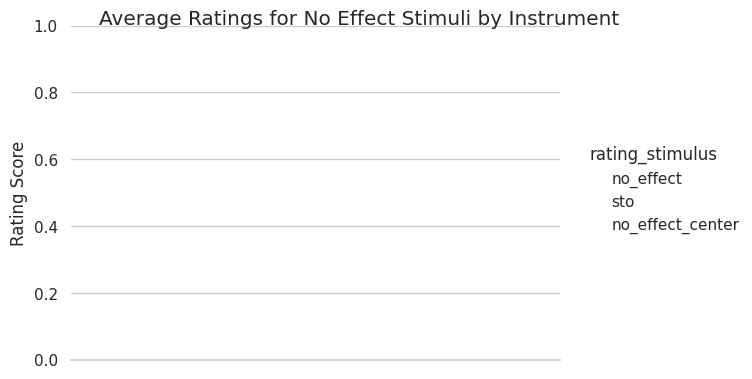

In [216]:
def plot_instrument_boxplot(data):
    # Create a mapping between session_test_id and instrument names
    instruments_map = {
        "p3s_atiam0": "flute",
        "p3s_atiam1": "clarinet",
        "p3s_atiam2": "cello",
        "p3s_atiam3": "1st violin",
        "p3s_atiam4": "2nd violin"
    }

    # Filter data by overall trial_id and the three stimuli of interest
    stimuli = ["no_effect_center", "no_effect", "sto"]
    overall_data = data[data["trial_id"] == "overall"]
    overall_data = overall_data[overall_data["rating_stimulus"].isin(stimuli)]

    # Map session_test_id to instrument names
    overall_data["instrument"] = overall_data["session_test_id"].map(instruments_map)

    # Create the boxplot using seaborn
    sns.set(style="whitegrid")
    g = sns.catplot(x="instrument", y="rating_score", hue="rating_stimulus", kind="box", data=overall_data, height=4, aspect=1.5)
    g.set_axis_labels("", "Rating Score")
    g.fig.suptitle("Average Ratings for No Effect Stimuli by Instrument")
    g.despine(left=True)
    g.set_xticklabels(rotation=45)

    plt.show()
    

plot_instrument_boxplot(data)


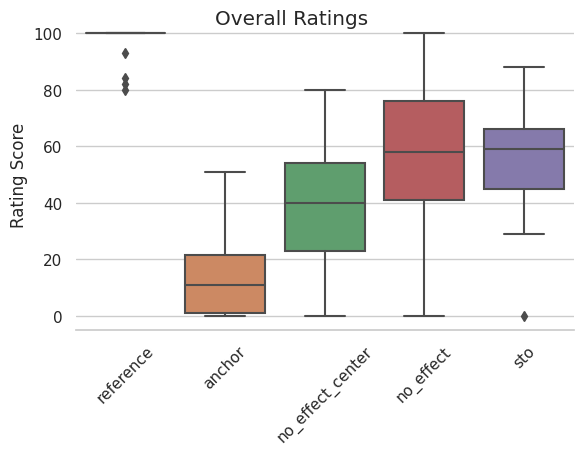

In [248]:
def plot_overall_ratings_boxplot(data):
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    overall_data = data[data['trial_id'] == 'overall']
    g = sns.catplot(x='rating_stimulus', y='rating_score', kind='box', data=overall_data, 
                    order=stimuli_order, height=4, aspect=1.5)
    g.set_axis_labels("", "Rating Score")
    g.fig.suptitle('Overall Ratings')
    g.despine(left=True)
    g.set_xticklabels(stimuli_order, rotation=45)

plot_overall_ratings_boxplot(data)

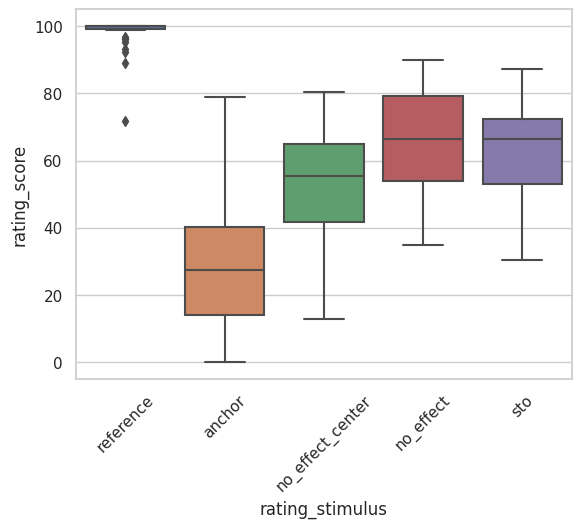

In [122]:
def plot_average_rating_boxplot(data):
    data = data[(data["trial_id"] == "interference") | (data["trial_id"] == "distortion") | (data["trial_id"] == "artifacts")]
    data = data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()
    sns.set(style="whitegrid")
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']
    sns.boxplot(x="rating_stimulus", y="rating_score", data=data, order=stimuli_order)
    # rotate x labels
    plt.xticks(rotation=45)
    plt.show()

plot_average_rating_boxplot(data)


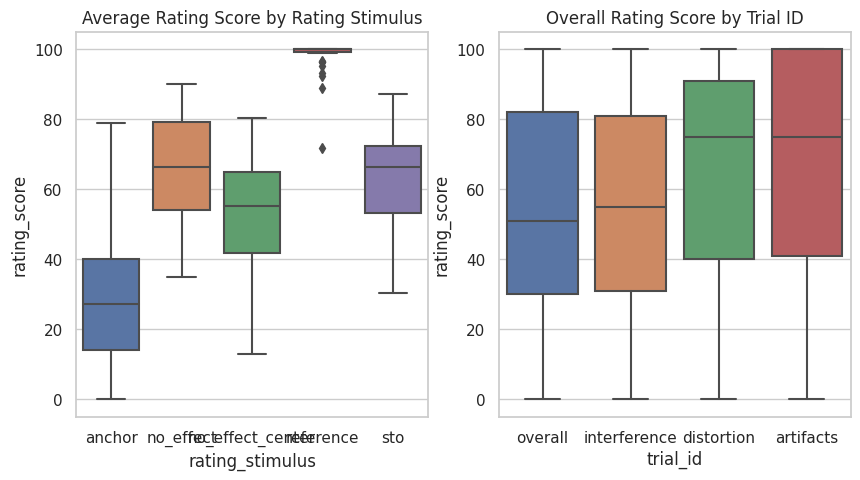

In [113]:

def plot_boxplots(data):
    stimuli_order = ['reference', 'anchor', 'no_effect_center', 'no_effect', 'sto']

    avg_data = data[(data["trial_id"] == "interference") | (data["trial_id"] == "distortion") | (data["trial_id"] == "artifacts")]
    avg_data = avg_data.groupby(["rating_stimulus", "email", "age", "gender", "musical_training_years"], as_index=False)["rating_score"].mean()

    # Plot the boxplots
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    sns.boxplot(x='rating_stimulus', y='rating_score', data=avg_data, ax=axs[0])

    sns.boxplot(x='trial_id', y='rating_score', data=data, ax=axs[1], order=['overall','interference', 'distortion', 'artifacts'])
    
    # Set the titles
    axs[0].set_title('Average Rating Score by Rating Stimulus')
    axs[1].set_title('Overall Rating Score by Trial ID')
    
    # Show the plot
    plt.show()

plot_boxplots(data)